# Changement du répertoire courant

In [4]:
import os
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import plot_partial_dependence

# Changer le répertoire courant : préciser le chemin vers le dossier contenant la base de données 

os.chdir(r"C:\Users\USER\Desktop\M2\SEMESTRE_2\ML_Interpretable")

# Importation de la base de données

In [5]:
import pandas as pd

dataBase = pd.read_csv('GermanDataset.data', sep=" ", header=None,names=["accountStatus","creditDuration","creditHistory","Purpose","creditAmount","Savings","employmentDuration","installmentRate","gender&PersonalStatus","Guarantor","residenceTime","Property","Age","otherInstallmentPlan","Housing","numberOfCredit","Job","NumberLiablePeople","Telephone","foreignWorker","creditRisk"])

### Aperçu de la base de données

In [6]:
dataBase.head()

,accountStatus,creditDuration,creditHistory,Purpose,creditAmount,Savings,employmentDuration,installmentRate,gender&PersonalStatus,Guarantor,...,Property,Age,otherInstallmentPlan,Housing,numberOfCredit,Job,NumberLiablePeople,Telephone,foreignWorker,creditRisk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### Quelques informations 

In [7]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
accountStatus            1000 non-null object
creditDuration           1000 non-null int64
creditHistory            1000 non-null object
Purpose                  1000 non-null object
creditAmount             1000 non-null int64
Savings                  1000 non-null object
employmentDuration       1000 non-null object
installmentRate          1000 non-null int64
gender&PersonalStatus    1000 non-null object
Guarantor                1000 non-null object
residenceTime            1000 non-null int64
Property                 1000 non-null object
Age                      1000 non-null int64
otherInstallmentPlan     1000 non-null object
Housing                  1000 non-null object
numberOfCredit           1000 non-null int64
Job                      1000 non-null object
NumberLiablePeople       1000 non-null int64
Telephone                1000 non-null object
foreignWorker            10

In [8]:
import numpy as np

In [9]:
dataBase.loc[dataBase["accountStatus"]=="A11","accountStatus"] = 1
dataBase.loc[dataBase["accountStatus"]=="A12","accountStatus"] = 1
dataBase.loc[dataBase["accountStatus"]=="A13","accountStatus"] = 1
dataBase.loc[dataBase["accountStatus"]=="A14","accountStatus"] = 0

### Valeurs manquantes ?

In [10]:
missing = dataBase.isna()

missing.sum().sum() # Calcul du nombre de valeurs manquantes dans la base de données 

0

# Passage des variables qualitatives en dummies + recodage variable de réponse

creditRisk : Encodage => 1 : GOOD , 0 : BAD 

In [11]:
dataBase["creditRisk"] = dataBase["creditRisk"].replace(2,0) # Passage de la variable creditRisk en codage binaire

copyDataBase = dataBase.copy()

for colName in dataBase.columns: # Itération sur les noms de colonnes
    if dataBase[colName].dtypes == "object":
        # Passage variables polytomiques en variable dichotomiques 
        dataBase = pd.get_dummies(dataBase, columns=[colName])

On retire les dummies suivantes : "accountStatus_0","foreignWorker_A202","Telephone_A192", car elles ne font que répéter de l'information. 

In [12]:
dataBase = dataBase.drop(["foreignWorker_A202","Telephone_A192"],axis=1) # inplace=True

In [13]:
dataBase.shape # Dimensions de la base de données 

(1000, 57)

### Recodage de la variable gender&PersonalStatus

gender&PersonalStatus = 0 => Male

gender&PersonalStatus = 1 => Female

In [14]:
dataBaseGender = dataBase.copy()

dataFrameGender = pd.DataFrame(copyDataBase["gender&PersonalStatus"]) # Récupère colonne de la base initiale

dataBaseGender = pd.concat([dataBaseGender,dataFrameGender],axis=1)

# Retire les différentes variables dummy concernant la variable gender&PersonalStatus 

dataBaseGender.drop(["gender&PersonalStatus_A91","gender&PersonalStatus_A92","gender&PersonalStatus_A93","gender&PersonalStatus_A94"],axis=1,inplace=True)

''' Recodage de la variable gender&PersonalStatus en variable genre avec pour modalités:
        - 0 : Male
        - 1 : Female 
'''

male = ["A91","A93","A94"]
female = ["A92","A95"]

for modalites in male:
    dataBaseGender["gender&PersonalStatus"] = dataBaseGender["gender&PersonalStatus"].replace(modalites,"0")

for modalites in female:
    dataBaseGender["gender&PersonalStatus"] = dataBaseGender["gender&PersonalStatus"].replace(modalites,"1")

dataBaseGender.rename(columns={"gender&PersonalStatus":"gender","Telephone_A191":"Telephone"},inplace=True)

In [15]:
x = dataBaseGender.drop(["creditRisk"],axis=1)
y = dataBaseGender["creditRisk"]

# Arbre de décision

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report,roc_curve,roc_auc_score

In [17]:
model_fit =  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best').fit(x,y)

### Prédictions (0,1) récupérées du modèle.

In [18]:
predictions = model_fit.predict(x) 
predictionTree = predictions.copy()

In [19]:
proba_Tree = []

for probs in model_fit.predict_proba(x):
    proba_Tree.append(probs[1])
    
proba_Tree = pd.DataFrame([proba_Tree]).transpose()
proba_Tree.columns= ["S"]

In [20]:
confusion_matrix(y,predictionTree)

sumDiagonal=0
for j in range(0,2):
    sumDiagonal += confusion_matrix(y,predictionTree)[j][j]
accuracy = round( (sumDiagonal / proba_Tree.shape[0])*100,2)
print("Taux d'exactitude:",accuracy,"%")

Taux d'exactitude: 76.2 %


In [21]:
AUCTree = roc_auc_score(y,proba_Tree)
print("AUC :",round(AUCTree,4))

AUC : 0.8232


## Feature Importance

In [22]:
import matplotlib.pyplot as plt

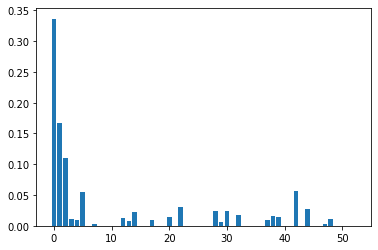


Variable: accountStatus   Feature: 0, Score: 0.33634 

Variable: creditDuration   Feature: 1, Score: 0.16716 

Variable: creditAmount   Feature: 2, Score: 0.11028 

Variable: installmentRate   Feature: 3, Score: 0.01066 

Variable: residenceTime   Feature: 4, Score: 0.00979 

Variable: Age   Feature: 5, Score: 0.05497 

Variable: numberOfCredit   Feature: 6, Score: 0.00000 

Variable: NumberLiablePeople   Feature: 7, Score: 0.00311 

Variable: creditHistory_A30   Feature: 8, Score: 0.00000 

Variable: creditHistory_A31   Feature: 9, Score: 0.00000 

Variable: creditHistory_A32   Feature: 10, Score: 0.00000 

Variable: creditHistory_A33   Feature: 11, Score: 0.00000 

Variable: creditHistory_A34   Feature: 12, Score: 0.01323 

Variable: Purpose_A40   Feature: 13, Score: 0.00834 

Variable: Purpose_A41   Feature: 14, Score: 0.02240 

Variable: Purpose_A410   Feature: 15, Score: 0.00000 

Variable: Purpose_A42   Feature: 16, Score: 0.00000 

Variable: Purpose_A43   Feature: 17, Score: 0.

In [23]:
importance = model_fit.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

for i,v in enumerate(importance):
    print("\nVariable:", x.columns[i]," ",'Feature: %0d, Score: %.5f ' % (i,v))

# INTERPRETATION DU MODELE 

Pour l'interpretation du modèle, je vais utilise les méthodes suivantes: 

➢ Partial Dependence Plot (PDP)

➢ Individual Conditional Expectation (ICE)

➢ Accumulated Local Effects (ALE)


**Partial Dependence Plot (PDP)**

Le **PDP** a pour but de representer l'effet marginale d'une variable sur la prévision du modèle.
Il montre la relation entre la variable explicative et la variable expliquée qu'elle est soit linéaire, monotone ou complex

Pour construire le PDP, je vais générer des valeurs comprises entre le minimun et le maximun pour les variables quantitatives.

In [24]:
import statistics
from statistics import mean
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
def pdp(feat,va):
    bd=pd.DataFrame(columns=['prob','vari'])
    i=0
    while i<len(va):
        x1=x.copy()
        x1.loc[:,feat]=va[i]
        Y_pred1 = (model_fit.predict_proba(x1))
        Ym=mean(Y_pred1[:,1])
        bd.loc[i]=[Ym,va[i]]
        i=i+1
    plt.plot(bd.vari, bd.prob)
    plt.xlabel(feat,fontsize=18)
    plt.ylabel('Probabilité',fontsize=18)
    plt.ylim(0,1)

- La variable Age

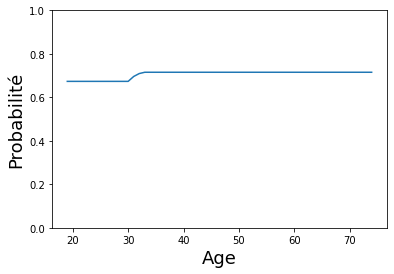

In [26]:
mia=min(dataBaseGender.Age)#minimun
maa=max(dataBaseGender.Age)#maximun
#Nx=np.random.randint(mia,maa,1000)#1000 c'est la taille de l'echantillon
Nx=range(mia,maa)
pdp('Age',Nx)#Nx represente la plage 

- La variable account Status

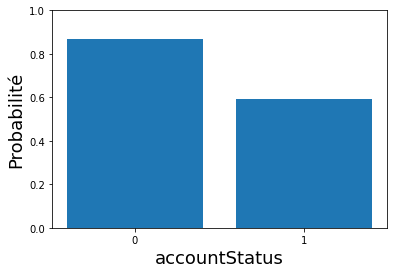

In [27]:
l=np.array([1,0])
def pdpq(feat,va):
    #feat: il prend en argument la variable sur laquelle on construit lE pdp
    #va: prends comme argument la grille de valeurs pour construire le pdp
    bd=pd.DataFrame(columns=['prob','vari'],dtype=int)
    i=0
    while i<len(va):
        x1=x.copy()
        x1.loc[:,feat]=va[i]
        Y_pred1 = (model_fit.predict_proba(x1))
        Ym=mean(Y_pred1[:,1])
        bd.loc[i]=[Ym,va[i]]
        i=i+1
    plt.bar(bd.vari, bd.prob)
    plt.xlabel(feat,fontsize=18)
    axes = plt.gca() 
    axes.xaxis.set_ticks(range(2))
    plt.ylabel('Probabilité',fontsize=18)
    plt.ylim(0,1)
pdpq('accountStatus',l)

- **VERIFICATION**

(0.67, 0.72)

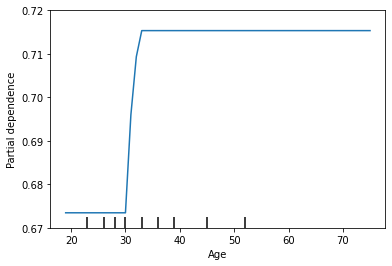

In [28]:
plot_partial_dependence(model_fit,features=[5], X=x) 
plt.ylim(0,1)

(0.57, 0.885)

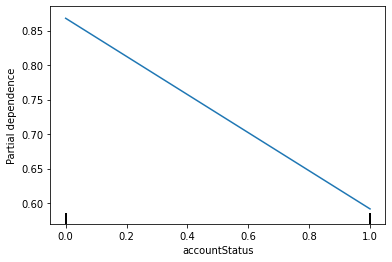

In [29]:
plot_partial_dependence(model_fit,features=[0], X=x) 
plt.ylim(0,1)

# Individual Conditional Expectation ICE

L'**ICE**  montre le changement de la probabilité quand la variariable explicative change pour un individu donné.

-Pour chaque observation, la courbe associée à la variable Age correspond à la variation en fonction des differentes valeurs de l'Age

In [90]:
def ICE(feat,va,n,type):
    #feat: il prend en argument la variable sur laquelle on construit l'ICE
    #va: prends comme argument la grille de valeurs pour construire l'ICE 
    #n: c'est le nombre d'individu qu'on veut representer
    #type: c'est le type de la variable elle prends 0 si la variable est quantitative et 1 si elle est catégorielle 
    for J in range(n):
        bd=pd.DataFrame(columns=['prob','vari'])
        i=0 
        while i<len(va):
            x1=pd.DataFrame(x.iloc[J,:]).transpose()
            x1.loc[:,feat]=va[i] 
            Y_pred1 = (model_fit.predict_proba(x1))
            Ym=Y_pred1[:,1]
            bd.loc[i]=[Ym,va[i]]
            i=i+1
        plt.plot(bd.vari, bd.prob)
    if type==1:
        axes = plt.gca() 
        axes.xaxis.set_ticks(range(2))
    plt.xlabel(feat,fontsize=18)
    plt.ylabel('Probabilité',fontsize=18)

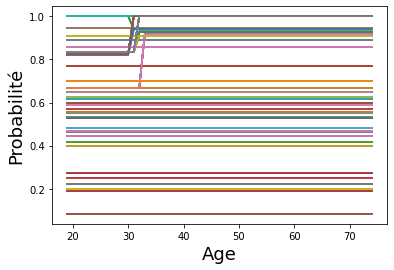

In [31]:
ICE('Age',Nx,1000,0)#correspond au nombre d'induvidus qu'on veut representer AVEC ICE

Avec ce graphique, on voit qui n'est pas interpretable d'où je diminue le nombre d'individu 

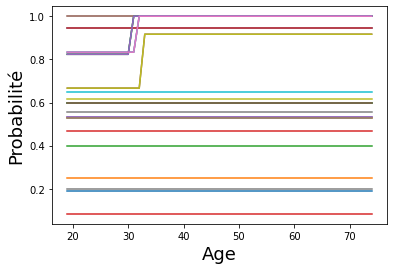

In [32]:
ICE('Age',Nx,30,0)

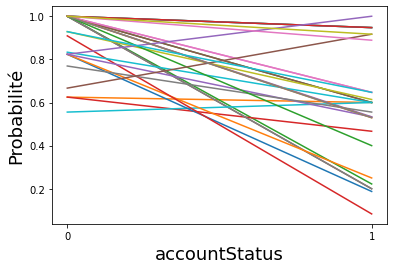

In [33]:
ICE('accountStatus',l,30,1)

#  **Accumulated Local Effects ALE**

Le ALE PLOT descrit comment les variables explicatives influencent la probabilité en tenant compte de l'independance entre les variables expliquatives.
Pour le construit,

- on divise l'espace de la variable explicative en intervalle
- Pour chaque interval, on calcul la difference entre la prédiction faite pour la valeur maximale et celle faite pour la valeur minimale 
- Les differences cumulés donne lieu la courbe ALE


In [88]:
def ALEe(feat,va):
    #va est 
    bd=pd.DataFrame(columns=['ALEi','vari'])
    i=1
    while i<len(va):
        x1=x[(x[feat]>= va[i-1]) & (x[feat]<=va[i])]#on cree un DataFrame contenant que les individus situés entre les intervalles
        v11=x1.copy()
        v12=x1.copy()
        v11.loc[:,feat]=va[i]
        Y_pred1=model_fit.predict_proba(v11)
        v12.loc[:,feat]=va[i-1]
        Y_pred2=model_fit.predict_proba(v12)
        kl=np.array(Y_pred1[:,1]-Y_pred2[:,1])
        Ym=mean(kl)
        bd.loc[i]=[Ym,va[i]]
        i=i+1
    bd['ALE']=np.cumsum(bd.ALEi)
    plt.plot(bd.vari, bd.ALE)
    plt.xlabel(feat,fontsize=18)
    plt.ylabel('ALE',fontsize=18)

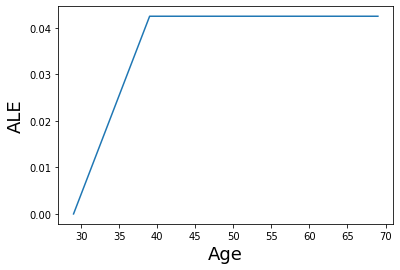

In [89]:
inter=np.array(range(mia,maa,10))#les bornes des groupes d'age
ALEe('Age',inter)